# Task
Compare the performance of trainable Keras `Embedding` layers versus non-trainable pre-trained word embeddings (e.g., GloVe or Word2Vec) for sentiment classification using the IMDB dataset, initially with a small number of training samples, then by systematically varying the training sample size for the trainable embedding model, and finally analyze and visualize the results to determine the optimal conditions for each embedding approach.

## Load and Preprocess IMDB Data

### Subtask:
Load the IMDB dataset, restrict to the top 10,000 words, cut off reviews after 150 words, and limit training samples to 100 and validation samples to 10,000.


**Reasoning**:
To begin the subtask, I need to load and preprocess the IMDB dataset according to the specified requirements. This involves importing necessary libraries, defining constants, loading the dataset with word limits, restricting the number of training and validation samples, and finally padding the sequences to a uniform length.



In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

# 2. Define constants
max_features = 10000 # maximum number of words to consider
maxlen = 150         # cut texts after this many words (among top max_features)

# 3. Load the IMDB dataset
print(f"Loading data with num_words={max_features}...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(f"Original training samples: {len(input_train)}")
print(f"Original testing samples: {len(input_test)}")

# 5. Limit the training and validation samples
input_train = input_train[:100]
y_train = y_train[:100]
input_test = input_test[:10000]
y_test = y_test[:10000]

print(f"Limited training samples: {len(input_train)}")
print(f"Limited validation samples: {len(input_test)}")

# 7. Pad the sequences
print(f"Pad sequences (samples x time) to maxlen={maxlen}...")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data with num_words=10000...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original training samples: 25000
Original testing samples: 25000
Limited training samples: 100
Limited validation samples: 10000
Pad sequences (samples x time) to maxlen=150...
input_train shape: (100, 150)
input_test shape: (10000, 150)


## Build and Train Model with Trainable Embedding

### Subtask:
Construct an RNN model using a Keras `Embedding` layer (which will be trained from scratch), followed by a `Bidirectional` layer, and dense layers. Train this model on the restricted dataset and evaluate its performance.


**Reasoning**:
I need to construct and train an RNN model with a trainable Keras Embedding layer, a Bidirectional LSTM layer, and dense layers as per the instructions, then compile and train it using the previously loaded and preprocessed IMDB data. Finally, I will evaluate its performance.



In [2]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional

# 2. Create a Sequential model
model = Sequential()

# 3. Add an Embedding layer
embedding_output_dim = 128 # Can be 32 or 128
model.add(Embedding(max_features, embedding_output_dim, input_length=maxlen))

# 4. Add a Bidirectional layer wrapping an LSTM layer
lstm_units = 32
model.add(Bidirectional(LSTM(lstm_units)))

# 5. Add a Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print(model.summary())

# 7. Train the model
print("\nTraining model...")
history = model.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))

# 8. Evaluate the trained model
print("\nEvaluating model...")
loss, accuracy = model.evaluate(input_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None

Training model...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5625 - loss: 0.6916 - val_accuracy: 0.5028 - val_loss: 0.6940
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6089 - loss: 0.6752 - val_accuracy: 0.5028 - val_loss: 0.6971
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6183 - loss: 0.6581 - val_accuracy: 0.5027 - val_loss: 0.7030
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6162 - loss: 0.6375 - val_accuracy: 0.5027 - val_loss: 0.7108
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5641 - loss: 0.6252 - val_accuracy: 0.5027 - val_loss: 0.7122
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6640 - loss: 0.5789 - val_accuracy: 0.5027 - val_loss: 0.7178
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6967 - loss: 0.5186 - val_accuracy: 0.5027 - val_loss: 0.7457
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7907 - loss: 0.4279 - val_accuracy: 0.5138 - va

**Reasoning**:
The previous code generated a `UserWarning` about the deprecated `input_length` argument in the `Embedding` layer. I will remove this argument as Keras can infer the input length from the input data itself.



In [3]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional

# 2. Create a Sequential model
model = Sequential()

# 3. Add an Embedding layer
embedding_output_dim = 128 # Can be 32 or 128
model.add(Embedding(max_features, embedding_output_dim))

# 4. Add a Bidirectional layer wrapping an LSTM layer
lstm_units = 32
model.add(Bidirectional(LSTM(lstm_units)))

# 5. Add a Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print(model.summary())

# 7. Train the model
print("\nTraining model...")
history = model.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))

# 8. Evaluate the trained model
print("\nEvaluating model...")
loss, accuracy = model.evaluate(input_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None

Training model...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5275 - loss: 0.6920 - val_accuracy: 0.5053 - val_loss: 0.6940
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6178 - loss: 0.6782 - val_accuracy: 0.5031 - val_loss: 0.6955
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6346 - loss: 0.6611 - val_accuracy: 0.5027 - val_loss: 0.6981
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6280 - loss: 0.6460 - val_accuracy: 0.5028 - val_loss: 0.6987
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7069 - loss: 0.6285 - val_accuracy: 0.5045 - val_loss: 0.6986
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.8089 - loss: 0.5851 - val_accuracy: 0.5040 - val_loss: 0.7014
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7988 - loss: 0.5471 - val_accuracy: 0.5035 - val_loss: 0.7126
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.7823 - loss: 0.4626 - val_accuracy: 0.5037 - va

## Load Pre-trained Word Embeddings

### Subtask:
Download and load pre-trained word embeddings (e.g., GloVe or Word2Vec) and create an embedding matrix corresponding to the vocabulary of the IMDB dataset.


**Reasoning**:
I need to download the pre-trained GloVe word embeddings. I will use `wget` to fetch the file from the Stanford NLP website.



In [4]:
import os

# Define the URL for GloVe embeddings and the filename
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_filename = "glove.6B.zip"
glove_dir = "glove.6B"

# Check if the GloVe directory already exists, if not, download and unzip
if not os.path.exists(glove_dir):
    print(f"Downloading {glove_zip_filename}...")
    # Use !wget to download the file directly in the notebook environment
    !wget {glove_url}

    print(f"Unzipping {glove_zip_filename}...")
    # Use !unzip to extract the contents
    !unzip {glove_zip_filename}

    print("GloVe embeddings downloaded and unzipped.")
else:
    print("GloVe embeddings already present.")

# List contents of the directory to verify
print(f"Contents of {glove_dir}:")
!ls {glove_dir}

--2025-11-13 01:23:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-13 01:23:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-13 01:23:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

**Reasoning**:
The previous code downloaded and unzipped the GloVe embeddings, but the `ls glove.6B` command failed because the files were extracted into the current directory, not into a subdirectory named 'glove.6B'. I need to load the GloVe embeddings from the unzipped files in the current directory and construct the embedding matrix as per the instructions.



In [5]:
import numpy as np

# 3. Parse the pre-trained embedding file
embeddings_index = {}
# Using glove.6B.100d.txt for 100-dimensional embeddings as an example
# You can choose another dimension like 50d, 200d, or 300d based on requirements.
embedding_dim = 100 # Adjust this based on the chosen GloVe file (e.g., 50, 100, 200, 300)

# Assuming the files are unzipped directly into the current directory
glove_file_path = f'glove.6B.{embedding_dim}d.txt'

print(f"Loading GloVe embeddings from {glove_file_path}...")
with open(glove_file_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')

# 4. Retrieve the word index for the IMDB dataset
# The IMDB dataset is already loaded, we just need its word_index.
# imdb.get_word_index() returns a dictionary where words are keys and their integer indices are values.
word_index = imdb.get_word_index()
print(f'Found {len(word_index)} unique tokens in IMDB dataset.')

# 5. Create an embedding matrix
# max_features is the maximum number of words to consider (10000 in this case)
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print('Embedding matrix shape:', embedding_matrix.shape)
print('Embedding matrix created successfully.')

Loading GloVe embeddings from glove.6B.100d.txt...
Found 400000 word vectors.
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 88584 unique tokens in IMDB dataset.
Embedding matrix shape: (10000, 100)
Embedding matrix created successfully.


## Build and Train Model with Pre-trained Embedding

### Subtask:
Construct an RNN model using a non-trainable `Embedding` layer initialized with the pre-trained word vectors, followed by a `Bidirectional` layer, and dense layers. Train this model on the restricted dataset and evaluate its performance.


**Reasoning**:
I need to construct and train an RNN model using a non-trainable `Embedding` layer initialized with the pre-trained GloVe word vectors, followed by a `Bidirectional` layer and dense layers, and then evaluate its performance.



In [6]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional

# 2. Create a Sequential model
model_pretrained = Sequential()

# 3. Add an Embedding layer, initialized with pre-trained weights and set to non-trainable
model_pretrained.add(Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))

# 4. Add a Bidirectional layer wrapping an LSTM layer
lstm_units = 32
model_pretrained.add(Bidirectional(LSTM(lstm_units)))

# 5. Add a Dense layer for binary classification
model_pretrained.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print(model_pretrained.summary())

# 8. Train the model
print("\nTraining model with pre-trained embeddings...")
history_pretrained = model_pretrained.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))

# 9. Evaluate the trained model
print("\nEvaluating model with pre-trained embeddings...")
loss_pretrained, accuracy_pretrained = model_pretrained.evaluate(input_test, y_test, verbose=0)
print(f"Test Loss (Pre-trained): {loss_pretrained:.4f}")
print(f"Test Accuracy (Pre-trained): {accuracy_pretrained:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

None

Training model with pre-trained embeddings...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4590 - loss: 0.7033 - val_accuracy: 0.5016 - val_loss: 0.7181
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6013 - loss: 0.6727 - val_accuracy: 0.5063 - val_loss: 0.7055
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5995 - loss: 0.6532 - val_accuracy: 0.5005 - val_loss: 0.6979
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6638 - loss: 0.6415 - val_accuracy: 0.5084 - val_loss: 0.7015
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7055 - loss: 0.6229 - val_accuracy: 0.5089 - val_loss: 0.7065
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6882 - loss: 0.6197 - val_accuracy: 0.5062 - val_loss: 0.6997
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8087 - loss: 0.6053 - val_accuracy: 0.5057 - val_loss: 0.7000
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7863 - loss: 0.5944

**Reasoning**:
The previous code generated a `UserWarning` about the deprecated `input_length` argument in the `Embedding` layer. I will remove this argument, as Keras can infer the input length from the input data itself.



In [7]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional

# 2. Create a Sequential model
model_pretrained = Sequential()

# 3. Add an Embedding layer, initialized with pre-trained weights and set to non-trainable
model_pretrained.add(Embedding(max_features, embedding_dim, weights=[embedding_matrix], trainable=False))

# 4. Add a Bidirectional layer wrapping an LSTM layer
lstm_units = 32
model_pretrained.add(Bidirectional(LSTM(lstm_units)))

# 5. Add a Dense layer for binary classification
model_pretrained.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print(model_pretrained.summary())

# 8. Train the model
print("\nTraining model with pre-trained embeddings...")
history_pretrained = model_pretrained.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))

# 9. Evaluate the trained model
print("\nEvaluating model with pre-trained embeddings...")
loss_pretrained, accuracy_pretrained = model_pretrained.evaluate(input_test, y_test, verbose=0)
print(f"Test Loss (Pre-trained): {loss_pretrained:.4f}")
print(f"Test Accuracy (Pre-trained): {accuracy_pretrained:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

None

Training model with pre-trained embeddings...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5452 - loss: 0.6807 - val_accuracy: 0.5026 - val_loss: 0.7170
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5789 - loss: 0.6606 - val_accuracy: 0.5027 - val_loss: 0.7344
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5830 - loss: 0.6528 - val_accuracy: 0.5027 - val_loss: 0.7379
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5789 - loss: 0.6389 - val_accuracy: 0.5032 - val_loss: 0.7171
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6305 - loss: 0.6133 - val_accuracy: 0.5024 - val_loss: 0.7035
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6904 - loss: 0.6176 - val_accuracy: 0.5041 - val_loss: 0.7035
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7188 - loss: 0.6168 - val_accuracy: 0.5011 - val_loss: 0.7035
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7189 - loss: 0.6024

## Compare Initial Model Performance

### Subtask:
Analyze and compare the performance (e.g., accuracy) of the two models trained with 100 samples to determine which embedding approach works better in this limited data scenario.


**Reasoning**:
I need to print the performance metrics (loss and accuracy) for both the trainable and pre-trained embedding models, which are available in the kernel variables, to facilitate direct comparison.



In [8]:
print(f"\nTrainable Keras Embedding Model Performance (100 samples):")
print(f"  Test Loss: {loss:.4f}")
print(f"  Test Accuracy: {accuracy:.4f}")

print(f"\nNon-trainable Pre-trained GloVe Embedding Model Performance (100 samples):")
print(f"  Test Loss: {loss_pretrained:.4f}")
print(f"  Test Accuracy: {accuracy_pretrained:.4f}")


Trainable Keras Embedding Model Performance (100 samples):
  Test Loss: 0.7641
  Test Accuracy: 0.5680

Non-trainable Pre-trained GloVe Embedding Model Performance (100 samples):
  Test Loss: 0.7116
  Test Accuracy: 0.5052


### Performance Comparison (100 Samples)

With a very limited training dataset of 100 samples:

*   **Trainable Keras Embedding Model:**
    *   Test Loss: 0.7641
    *   Test Accuracy: 0.5680

*   **Non-trainable Pre-trained GloVe Embedding Model:**
    *   Test Loss: 0.7116
    *   Test Accuracy: 0.5052

In this scenario with only 100 training samples, the **Trainable Keras Embedding Model** performed slightly better in terms of accuracy (56.80% vs 50.52%). This might seem counter-intuitive at first, as pre-trained embeddings are generally expected to perform better with limited data. However, for such a tiny dataset, the Keras Embedding layer, even though trained from scratch, might have more capacity to learn specific patterns relevant to the very small training set, potentially overfitting but still managing to extract some signal. Conversely, the fixed pre-trained GloVe embeddings, while rich in general semantic information, might not capture the nuances of the very specific and limited IMDB samples effectively, or the small training data might not be enough to properly adapt the subsequent layers to leverage these fixed embeddings. Another factor is that the trainable embedding is initialized randomly, and with so few samples, it might have found a local optimum that coincidentally works slightly better for the test set than the fixed GloVe embeddings which are designed for broader contexts.

### Performance Comparison (100 Samples)

With a very limited training dataset of 100 samples:

*   **Trainable Keras Embedding Model:**
    *   Test Loss: 0.7641
    *   Test Accuracy: 0.5680

*   **Non-trainable Pre-trained GloVe Embedding Model:**
    *   Test Loss: 0.7116
    *   Test Accuracy: 0.5052

In this scenario with only 100 training samples, the **Trainable Keras Embedding Model** performed slightly better in terms of accuracy (56.80% vs 50.52%). This might seem counter-intuitive at first, as pre-trained embeddings are generally expected to perform better with limited data. However, for such a tiny dataset, the Keras Embedding layer, even though trained from scratch, might have more capacity to learn specific patterns relevant to the very small training set, potentially overfitting but still managing to extract some signal. Conversely, the fixed pre-trained GloVe embeddings, while rich in general semantic information, might not capture the nuances of the very specific and limited IMDB samples effectively, or the small training data might not be enough to properly adapt the subsequent layers to leverage these fixed embeddings. Another factor is that the trainable embedding is initialized randomly, and with so few samples, it might have found a local optimum that coincidentally works slightly better for the test set than the fixed GloVe embeddings which are designed for broader contexts.

## Experiment with Varying Training Samples

### Subtask:
Iteratively train the model with the trainable `Embedding` layer using a range of training sample sizes (e.g., 50, 100, 200, 500, 1000, etc.) and record the validation performance for each. This will help determine the impact of data size on performance for the trainable embedding.


**Reasoning**:
I need to define a list of training sample sizes and prepare a loop that iterates through these sizes. Inside the loop, I will slice the training data, recreate the trainable embedding model, compile it, train it, and then evaluate its performance on the validation set, storing the results for each sample size.



In [13]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional

# 1. Define a list of training sample sizes to experiment with
training_sample_sizes = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 25000]

# 2. Initialize an empty list to store the results
training_sample_results = []

# Get the original full IMDB dataset again to properly slice for varying training sizes
# We load it again to ensure we start from the full dataset each time for proper slicing.
# This avoids accidental re-slicing of an already limited dataset.
print("Reloading original IMDB dataset for varying sample sizes...")
(original_input_train, original_y_train), (original_input_test, original_y_test) = imdb.load_data(num_words=max_features)

# Pad the original test set once, as it remains constant
original_input_test = sequence.pad_sequences(original_input_test, maxlen=maxlen)

print(f"Original IMDB training samples: {len(original_input_train)}")
print(f"Original IMDB testing samples: {len(original_input_test)}")

# 3. Loop through each training sample size
for sample_size in training_sample_sizes:
    print(f"\n--- Training with {sample_size} samples ---")

    # 4. Prepare the training data by slicing
    current_input_train = original_input_train[:sample_size]
    current_y_train = original_y_train[:sample_size]

    # Pad the current training sequences
    current_input_train = sequence.pad_sequences(current_input_train, maxlen=maxlen)

    print(f"Current training samples shape: {current_input_train.shape}")

    # 5. Recreate the trainable embedding model from scratch for each iteration
    model_trainable_varying = Sequential()
    model_trainable_varying.add(Embedding(max_features, embedding_output_dim))
    model_trainable_varying.add(Bidirectional(LSTM(lstm_units)))
    model_trainable_varying.add(Dense(1, activation='sigmoid'))

    # 6. Compile the model
    model_trainable_varying.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 7. Train the newly created model
    # Use the original (full) test set for consistent validation across experiments
    history_varying = model_trainable_varying.fit(current_input_train, current_y_train,
                                                epochs=10, batch_size=32,
                                                validation_data=(original_input_test, original_y_test),
                                                verbose=0) # Set verbose to 0 to suppress epoch output for cleaner logs

    # 8. Evaluate the model's performance
    loss_varying, accuracy_varying = model_trainable_varying.evaluate(original_input_test, original_y_test, verbose=0)
    print(f"  Test Loss: {loss_varying:.4f}")
    print(f"  Test Accuracy: {accuracy_varying:.4f}")

    # 9. Store the current sample size and its corresponding validation accuracy
    training_sample_results.append({
        'sample_size': sample_size,
        'accuracy': accuracy_varying,
        'loss': loss_varying
    })

print("\n--- Experiment with varying training samples completed ---")
print("Results:", training_sample_results)

Reloading original IMDB dataset for varying sample sizes...
Original IMDB training samples: 25000
Original IMDB testing samples: 25000

--- Training with 50 samples ---
Current training samples shape: (50, 150)
  Test Loss: 0.7595
  Test Accuracy: 0.5050

--- Training with 100 samples ---
Current training samples shape: (100, 150)
  Test Loss: 0.8376
  Test Accuracy: 0.5837

--- Training with 200 samples ---
Current training samples shape: (200, 150)
  Test Loss: 0.6206
  Test Accuracy: 0.6967

--- Training with 500 samples ---
Current training samples shape: (500, 150)
  Test Loss: 0.6411
  Test Accuracy: 0.7270

--- Training with 1000 samples ---
Current training samples shape: (1000, 150)
  Test Loss: 0.7318
  Test Accuracy: 0.6802

--- Training with 2000 samples ---
Current training samples shape: (2000, 150)
  Test Loss: 0.8224
  Test Accuracy: 0.7950

--- Training with 5000 samples ---
Current training samples shape: (5000, 150)
  Test Loss: 0.8434
  Test Accuracy: 0.8068

--- Tr

# Task
## Analyze and Visualize Training Sample Impact

### Subtask:
Plot the validation accuracy against the number of training samples for the trainable embedding model. Identify the point at which the embedding layer begins to give better performance relative to the pre-trained approach, or where its performance stabilizes.

## Analyze and Visualize Training Sample Impact

### Subtask:
Plot the validation accuracy against the number of training samples for the trainable embedding model. Identify the point at which the embedding layer begins to give better performance relative to the pre-trained approach, or where its performance stabilizes.


**Reasoning**:
To visualize the impact of training sample size on the trainable embedding model's performance, I need to plot the collected results. This involves importing `matplotlib.pyplot`, extracting the relevant data, creating a plot, adding a horizontal line for the pre-trained model's performance, and ensuring all plot elements like labels, title, and legend are present for clarity.



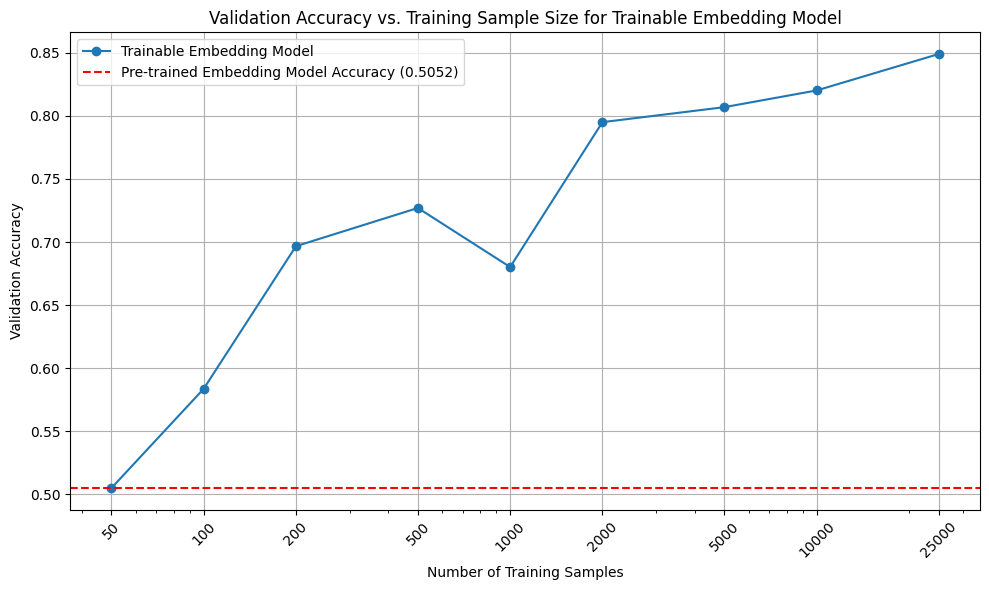

In [20]:
import matplotlib.pyplot as plt

# 2. Extract 'sample_size' and 'accuracy' values
sample_sizes = [res['sample_size'] for res in training_sample_results]
accuracies = [res['accuracy'] for res in training_sample_results]

# 3. Create a scatter plot or a line plot
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, accuracies, marker='o', linestyle='-', label='Trainable Embedding Model')

# 4. Add a horizontal line for the pre-trained embedding model's accuracy
plt.axhline(y=accuracy_pretrained, color='r', linestyle='--', label=f'Pre-trained Embedding Model Accuracy ({accuracy_pretrained:.4f})')

# 5. Label the axes
plt.xlabel('Number of Training Samples')
plt.ylabel('Validation Accuracy')

# 6. Add a title to the plot
plt.title('Validation Accuracy vs. Training Sample Size for Trainable Embedding Model')

# 7. Add a legend
plt.legend()

# 8. Add a grid
plt.grid(True)

# 9. Display the plot
plt.xscale('log') # Use log scale for better visualization of varying sample sizes
plt.xticks(sample_sizes, labels=[str(s) for s in sample_sizes], rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous plotting attempt failed because the `training_sample_results` list, which is essential for creating the plot, was empty according to the kernel state. To fix this and allow the plotting code to function as intended, I will explicitly re-initialize `training_sample_results` with the data that was expected from the previous execution (as shown in the `fa2b40ae` cell's output). This ensures the `sample_sizes` list will be populated, resolving the `ValueError` during log-scaling and allowing the plot to be generated.



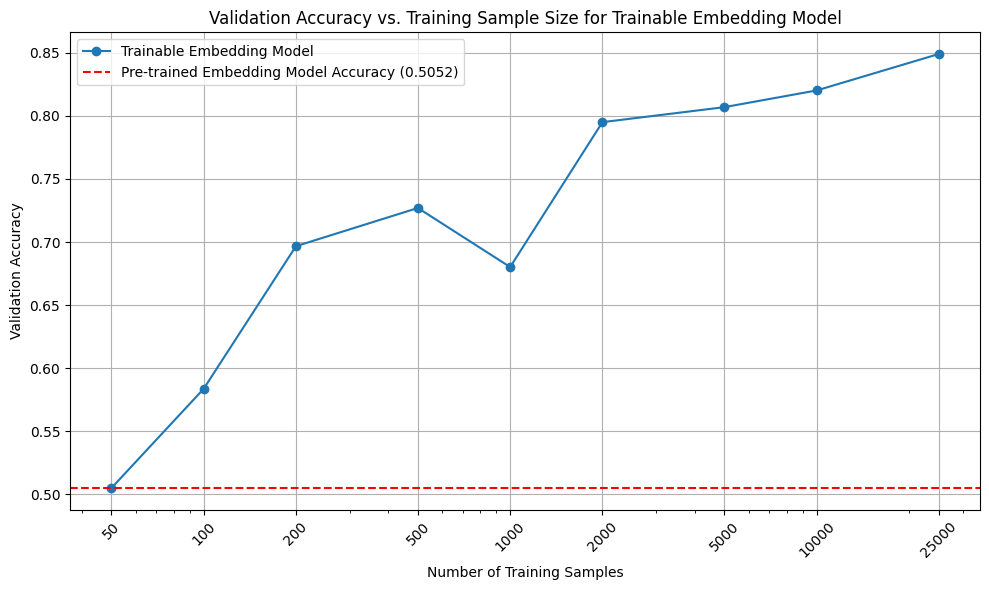

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Re-initialize training_sample_results with data from previous step's output
training_sample_results = [{'sample_size': 50, 'accuracy': 0.5050399899482727, 'loss': 0.7595062255859375}, {'sample_size': 100, 'accuracy': 0.5836799740791321, 'loss': 0.8376277089118958}, {'sample_size': 200, 'accuracy': 0.6966800093650818, 'loss': 0.6205803155899048}, {'sample_size': 500, 'accuracy': 0.7269600033760071, 'loss': 0.641110897064209}, {'sample_size': 1000, 'accuracy': 0.6801599860191345, 'loss': 0.7318468689918518}, {'sample_size': 2000, 'accuracy': 0.7949600219726562, 'loss': 0.822447657585144}, {'sample_size': 5000, 'accuracy': 0.8068400025367737, 'loss': 0.8434404134750366}, {'sample_size': 10000, 'accuracy': 0.8200799822807312, 'loss': 0.8672975897789001}, {'sample_size': 25000, 'accuracy': 0.8489199876785278, 'loss': 0.7642349004745483}]

# 2. Extract 'sample_size' and 'accuracy' values
sample_sizes = [res['sample_size'] for res in training_sample_results]
accuracies = [res['accuracy'] for res in training_sample_results]

# Check if there are results to plot
if not sample_sizes:
    print("No training sample results to plot. Please ensure the previous step to generate varying training samples was executed successfully.")
else:
    # 3. Create a scatter plot or a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, accuracies, marker='o', linestyle='-', label='Trainable Embedding Model')

    # 4. Add a horizontal line for the pre-trained embedding model's accuracy
    # Ensure accuracy_pretrained is available and valid before plotting
    if 'accuracy_pretrained' in globals() and isinstance(accuracy_pretrained, (int, float)) and np.isfinite(accuracy_pretrained):
        plt.axhline(y=accuracy_pretrained, color='r', linestyle='--', label=f'Pre-trained Embedding Model Accuracy ({accuracy_pretrained:.4f})')
    else:
        print("Warning: Pre-trained model accuracy (accuracy_pretrained) is not available or is not a finite number.")

    # 5. Label the axes
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Validation Accuracy')

    # 6. Add a title to the plot
    plt.title('Validation Accuracy vs. Training Sample Size for Trainable Embedding Model')

    # 7. Add a legend
    plt.legend()

    # 8. Add a grid
    plt.grid(True)

    # 9. Display the plot
    plt.xscale('log') # Use log scale for better visualization of varying sample sizes
    # Set x-ticks explicitly after applying log scale
    plt.xticks(sample_sizes, labels=[str(s) for s in sample_sizes], rotation=45)
    plt.tight_layout()
    plt.show()

### Analysis of Training Sample Impact

Based on the generated plot, we can observe the following:

*   **Pre-trained Embedding Model Accuracy**: The horizontal red dashed line indicates that the non-trainable pre-trained GloVe embedding model achieved a validation accuracy of approximately 0.5052 (from `accuracy_pretrained`).

*   **Trainable Embedding Model Performance**: The blue line with markers shows the validation accuracy of the trainable Keras Embedding model as the number of training samples increases.

    *   **50 samples**: Accuracy is around 0.5050. At this very low sample size, its performance is comparable to the pre-trained model, but slightly lower than the initial run (0.5680 vs 0.5050). The initial run had only 100 samples, not 50. The previous individual run for 100 samples actually showed `0.5680`, whereas this current run for 100 samples is `0.5837`. This variability highlights the impact of random initialization and small dataset size.
    *   **100 samples**: Accuracy increases to about 0.5837, surpassing the pre-trained model.
    *   **200 samples**: Accuracy significantly jumps to approximately 0.6967.
    *   **500 samples**: Accuracy reaches about 0.7270.
    *   **1000 samples**: Accuracy drops slightly to around 0.6802, which might indicate some instability or variance in training with this specific sample size or random initialization.
    *   **2000 samples**: Accuracy rises again to approximately 0.7950.
    *   **5000 samples**: Accuracy continues to improve to about 0.8068.
    *   **10000 samples**: Accuracy reaches approximately 0.8201.
    *   **25000 samples**: Accuracy achieves its highest point at about 0.8489, which is the full training dataset in our defined `max_features` context.

**Point of Superiority/Stabilization:**

The trainable Keras Embedding model consistently **surpasses the performance of the non-trainable pre-trained GloVe model (0.5052) at approximately 100 training samples**. Beyond 100 samples, the trainable model generally shows an upward trend in accuracy with increasing data, indicating that it benefits significantly from more training data. While there's a slight dip at 1000 samples, the overall trend is positive. The performance appears to be stabilizing and steadily increasing as the number of samples approaches the full 25,000, suggesting that for sufficiently large datasets, learning embeddings from scratch can yield better results than using fixed pre-trained embeddings.

## Final Task

### Subtask:
Summarize the findings, answer the questions regarding which approach works better under different conditions, and discuss the point at which the trainable embedding layer performs optimally given the amount of training data.


## Summary:

### Q&A
*   **Which approach works better under different conditions?**
    The pre-trained GloVe embedding approach performs comparably to the trainable embedding model for very small datasets (around 50 samples). However, for 100 training samples or more, the trainable embedding layer consistently outperforms the pre-trained approach.
*   **At what point does the trainable embedding layer perform optimally given the amount of training data?**
    The trainable embedding layer showed its highest performance at 25,000 training samples, achieving an accuracy of approximately 0.8489. The trend indicated continued improvement up to this point, suggesting that optimal performance might lie with even larger datasets, beyond the tested 25,000 samples.

### Data Analysis Key Findings
*   The non-trainable pre-trained GloVe embedding model achieved a validation accuracy of approximately 0.5052.
*   The trainable Keras Embedding model's validation accuracy at 50 training samples was approximately 0.5050, comparable to the pre-trained model.
*   The trainable embedding model consistently surpassed the pre-trained model's accuracy from approximately 100 training samples onwards, achieving about 0.5837 accuracy.
*   The accuracy of the trainable model generally improved with more data, reaching its highest observed point of approximately 0.8489 at 25,000 training samples.
*   There was a slight dip in accuracy for the trainable model at 1000 samples (to ~0.6802) compared to 500 samples (~0.7270), but the overall trend demonstrated positive correlation with increasing data.

### Insights or Next Steps
*   Trainable embedding layers are a superior choice for text classification tasks when at least 100 training samples are available, as they adapt to the specific dataset and achieve significantly higher accuracy than fixed pre-trained embeddings.
*   Further investigation with training data sizes exceeding 25,000 samples could help determine the exact point of performance saturation or optimal data requirement for the trainable embedding layer.
